# Housing Prices Prediction

In this notebook, we will explore a dataset related to housing prices. Our goal is to predict housing prices using regression models. We will perform data preparation, preprocessing, model training, and evaluation.  


In [1]:
# Importing necessary libraries for data manipulation, visualization, and model building

import pandas as pd

import numpy as np  # Numerical operations and handling arrays, including mathematical functions and operations

import seaborn as sns  # Statistical data visualization, built on top of matplotlib, for creating attractive and informative plots

import matplotlib.pyplot as plt  # Basic plotting library for creating static, interactive, and animated visualizations in Python

from sklearn.model_selection import train_test_split  # Function for splitting data into training and testing sets, which helps in evaluating model performance

from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Tools for preprocessing data:
# - StandardScaler: Standardizes features by removing the mean and scaling to unit variance
# - OneHotEncoder: Converts categorical variables into a one-hot numeric array

from sklearn.compose import ColumnTransformer  # Allows for applying different preprocessing pipelines to different subsets of features

from sklearn.pipeline import Pipeline  # Helps in chaining multiple steps together, such as preprocessing and model training, into a single workflow

from sklearn.impute import SimpleImputer  # Handles missing values by imputation, using strategies like mean, median, or constant values

from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Linear regression models:
# - LinearRegression: Basic linear regression model
# - Ridge: Linear regression with L2 regularization to prevent overfitting
# - Lasso: Linear regression with L1 regularization to perform feature selection

from sklearn.tree import DecisionTreeRegressor  # Decision tree regression model that predicts the target variable by learning simple decision rules from data features

from sklearn.ensemble import RandomForestRegressor  # Ensemble learning method that combines multiple decision trees to improve performance and robustness

from sklearn.svm import SVR  # Support Vector Regression model that tries to fit the best line within a margin of tolerance, effective in high-dimensional spaces

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Metrics for evaluating regression models:
# - mean_absolute_error: Measures the average magnitude of errors in predictions
# - mean_squared_error: Measures the average of the squares of errors, penalizing larger errors more
# - r2_score: Represents the proportion of variance in the target variable that is predictable from the features


## Data Exploration and Preprocessing

In this section, we will:
1. Load the Housing Dataset.
2. Performe Exploratory Data Analysis (EDA) to understand the dataset.
3. Handle missing values, normalize/standardize features, and encode categorical variables as needed.
4. Split the dataset into training and testing sets.

In [2]:
# 1.1 Loading the dataset
df = pd.read_csv('housing.csv')
# Display the first few rows of the dataset
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### Exploratory Data Analysis (EDA)

We will analyze summary statistics, feature distributions, missing values, and correlations.


Columns in DataFrame: 
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


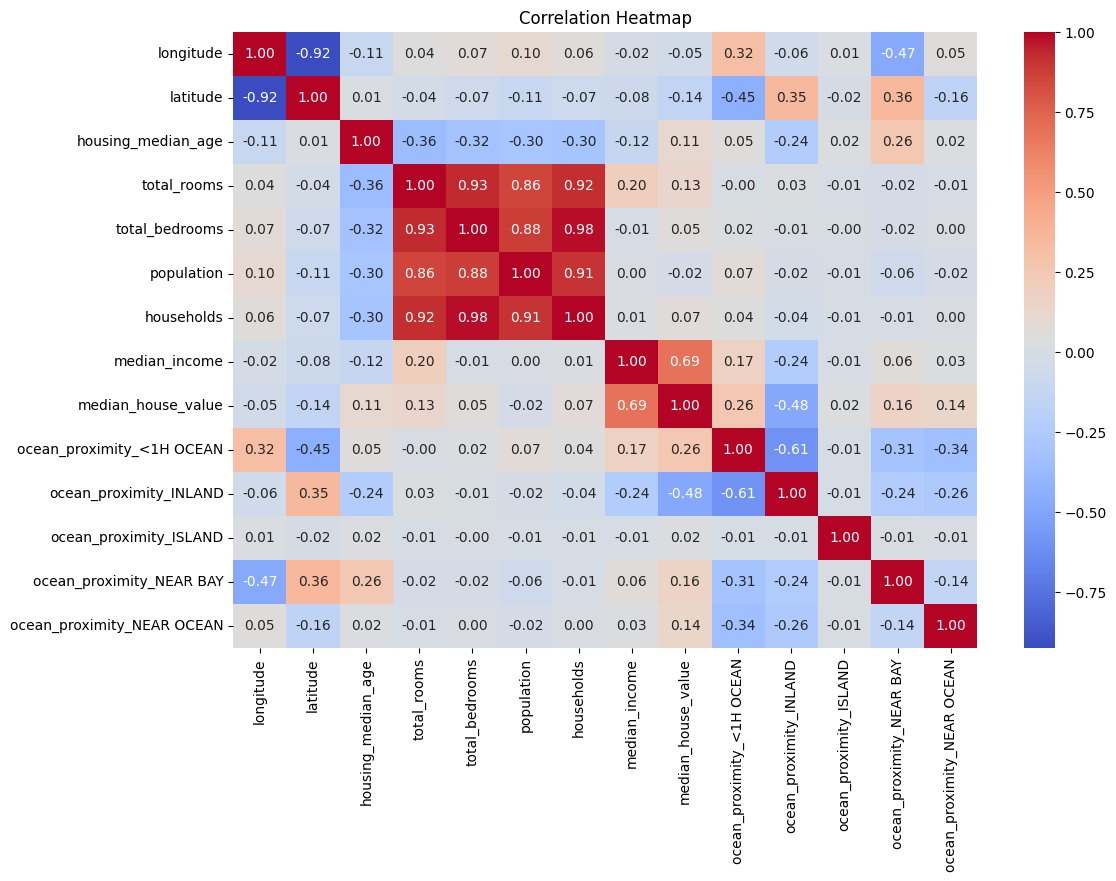

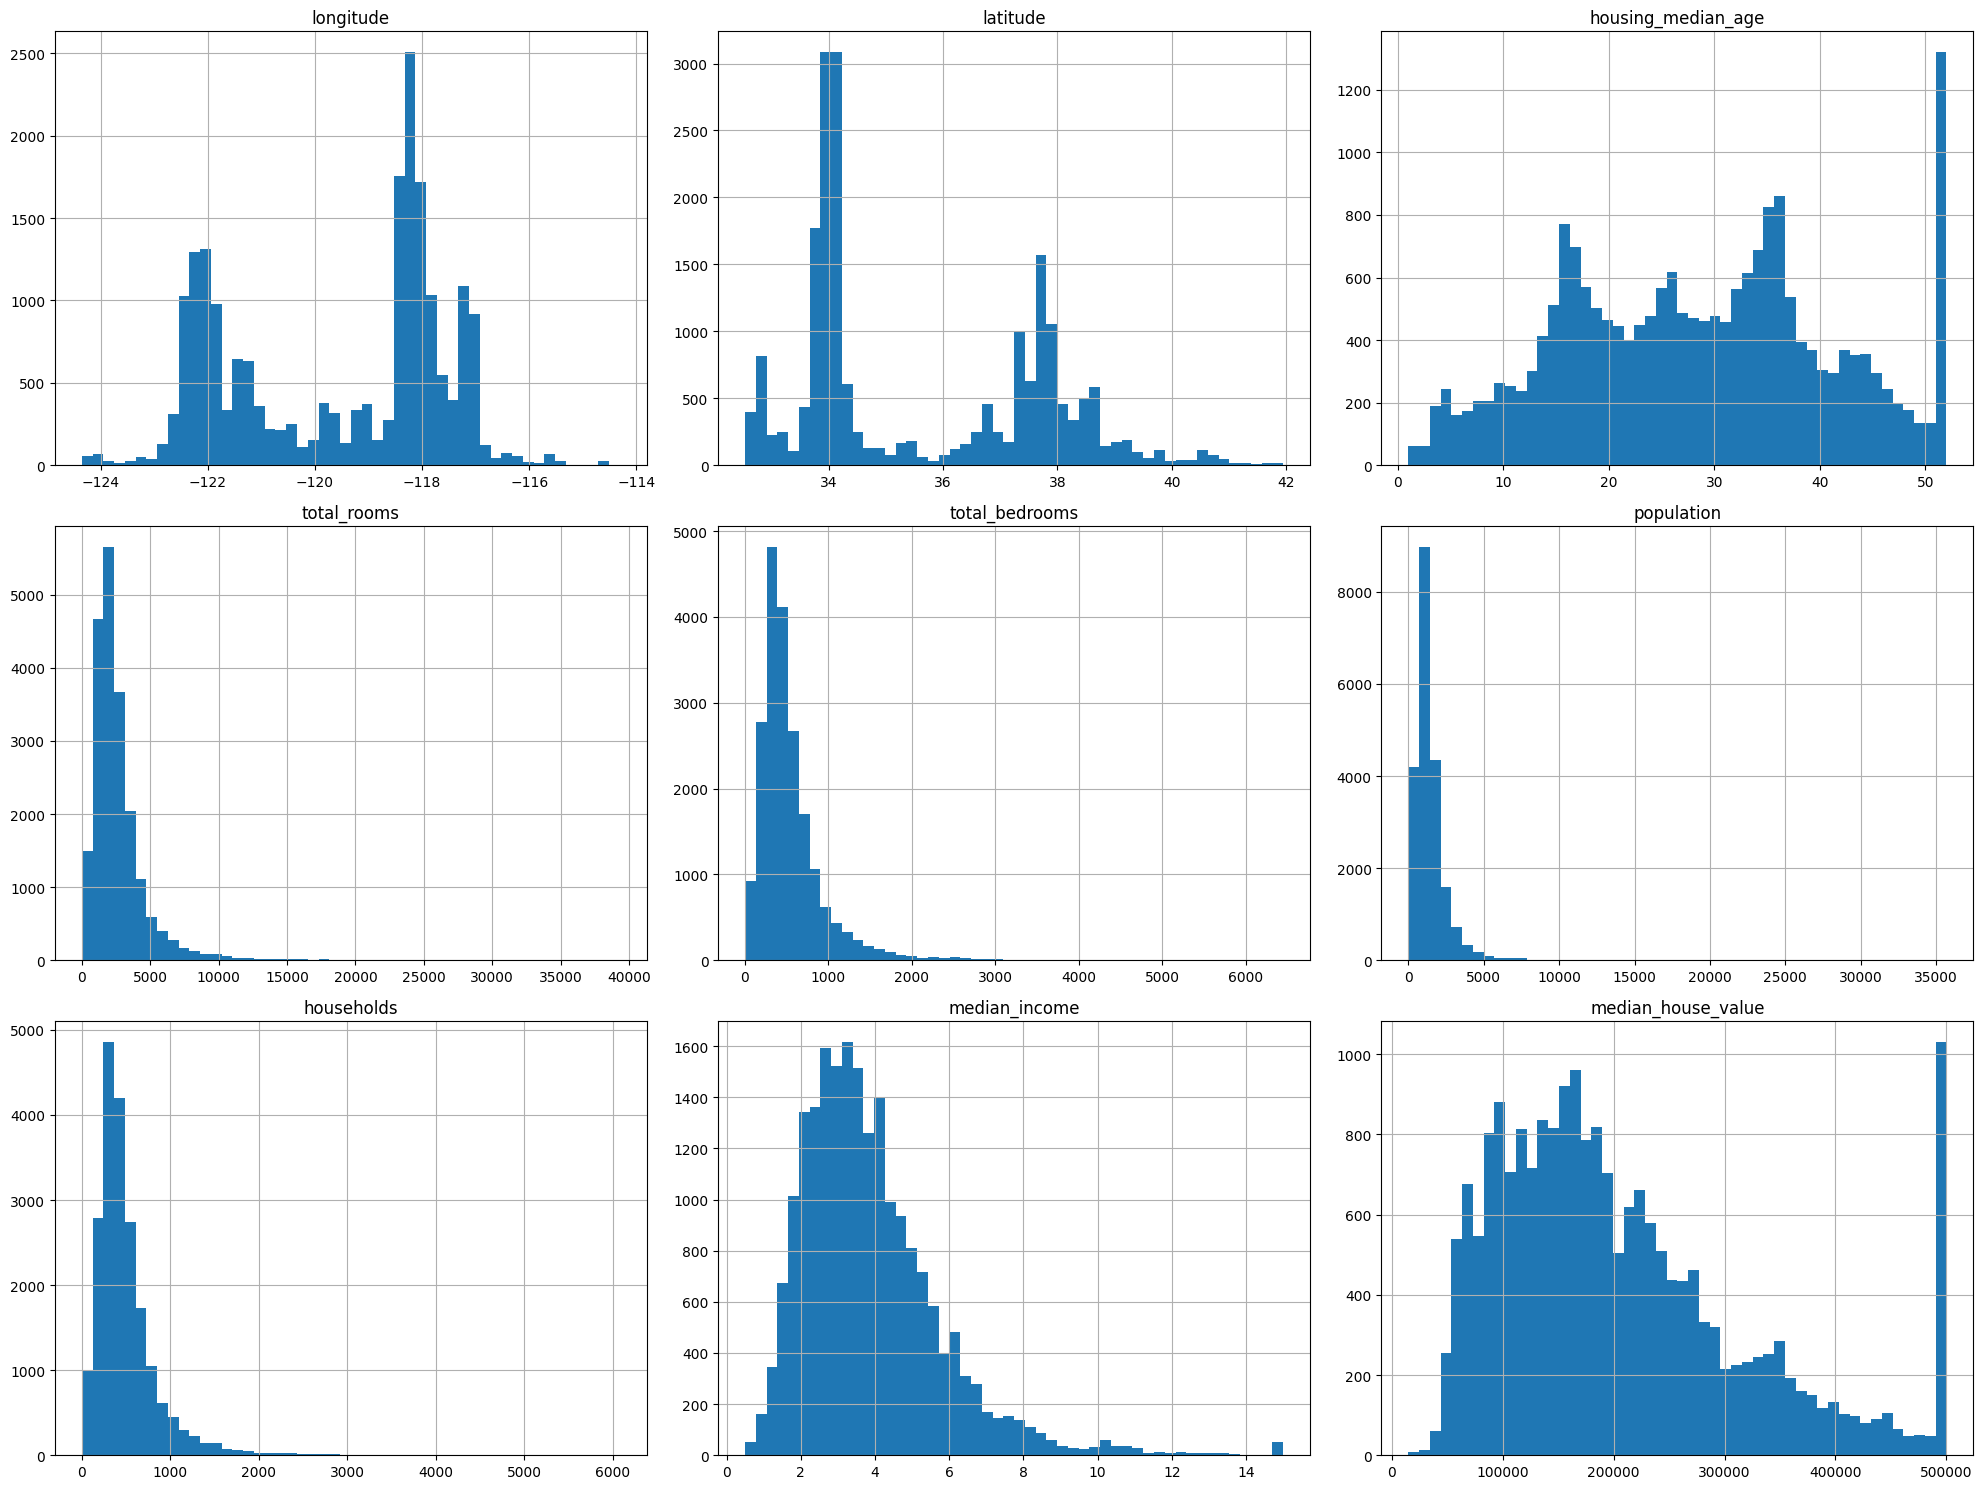

In [8]:
# Checking the data types, non-null counts, and summary statistics of the dataset

# Check column names
print(f"Columns in DataFrame: \n{df.columns.tolist()}")
df.info()
df.describe()

# Checking for missing values
df.isnull().sum()

# One-hot encoding 'ocean_proximity'
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

# Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Histograms of feature distributions
df_encoded.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()


### Data Preprocessing

We will handle missing values, normalize/standardize features, and encode categorical variables.


In [14]:
# Handle missing values and encode categorical variables
# For simplicity, we assume 'ocean_proximity' is the only categorical column

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('median_house_value')  # Exclude the target variable

# Define preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())])  # Standardize features

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encoding

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Define the target variable and features
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Data Visualization

We will create visualizations to explore the dataset and results of the models:
- Histograms or density plots of feature distributions.
- Scatter plots to analyze relationships between features and the target variable.
- Correlation heatmap to visualize feature relationships.
- Residual plots for each regression model.
- Performance comparison of different models.


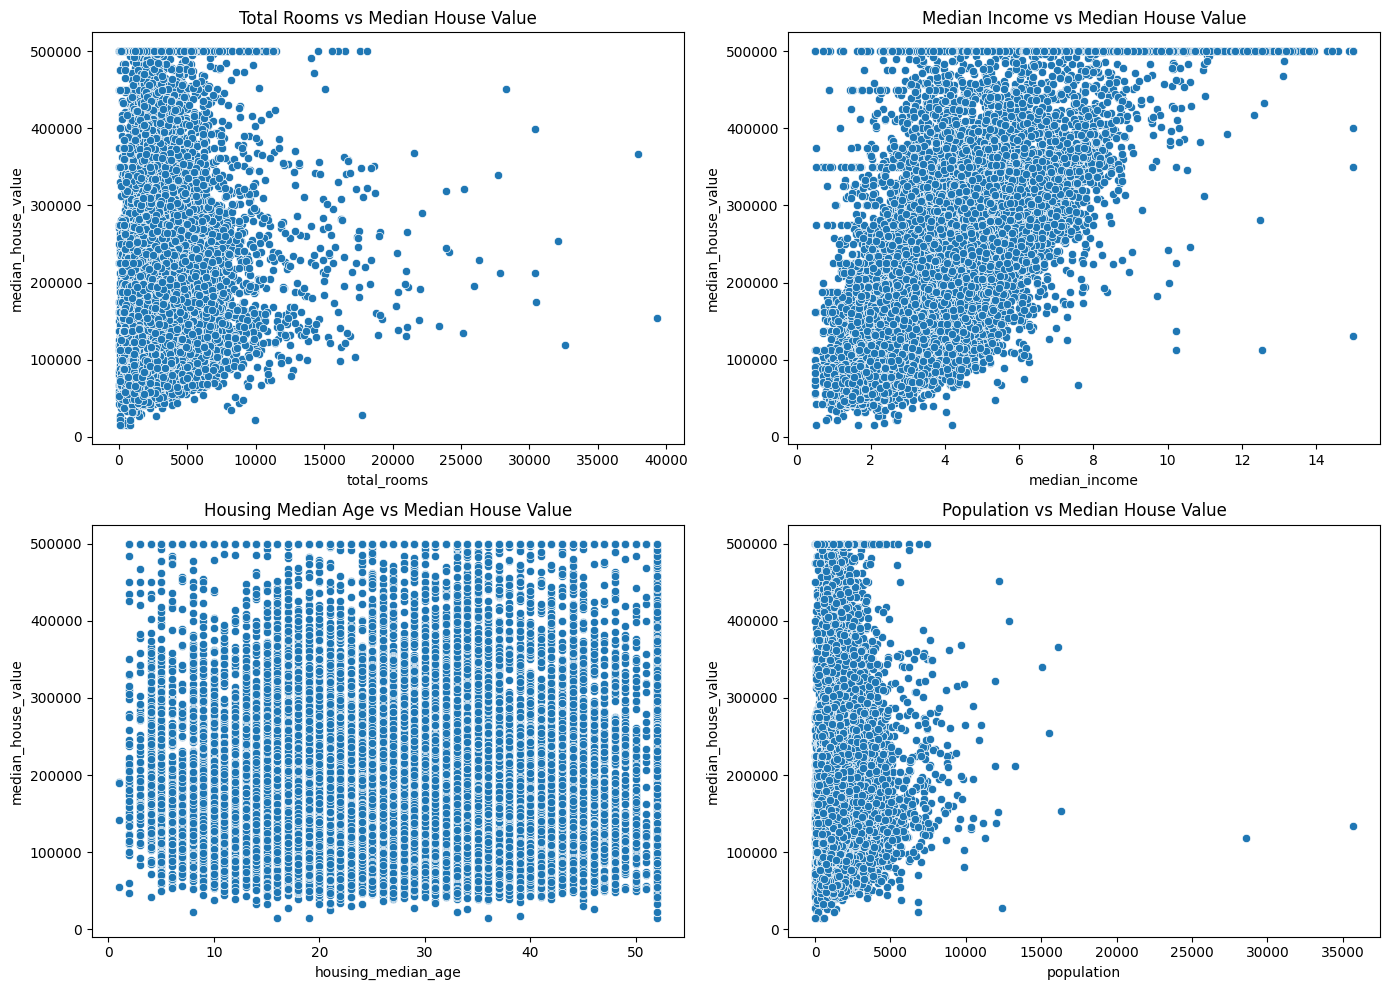

In [6]:
# Scatter plots to analyze relationships between features and the target variable
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='total_rooms', y='median_house_value', data=df)
plt.title('Total Rooms vs Median House Value')

plt.subplot(2, 2, 2)
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median Income vs Median House Value')

plt.subplot(2, 2, 3)
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df)
plt.title('Housing Median Age vs Median House Value')

plt.subplot(2, 2, 4)
sns.scatterplot(x='population', y='median_house_value', data=df)
plt.title('Population vs Median House Value')

plt.tight_layout()
plt.show()

# Residual plots for each regression model
def plot_residuals(model, X_test, y_test):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.show()



## Model Implementation

We will implement and evaluate the following regression models:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression (SVR)

Each model will be trained on the training set and evaluated on the test set.


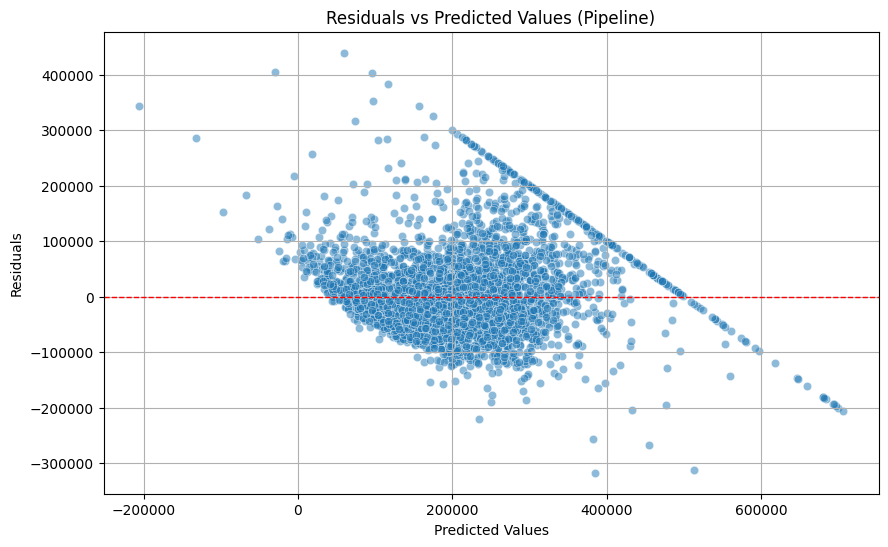

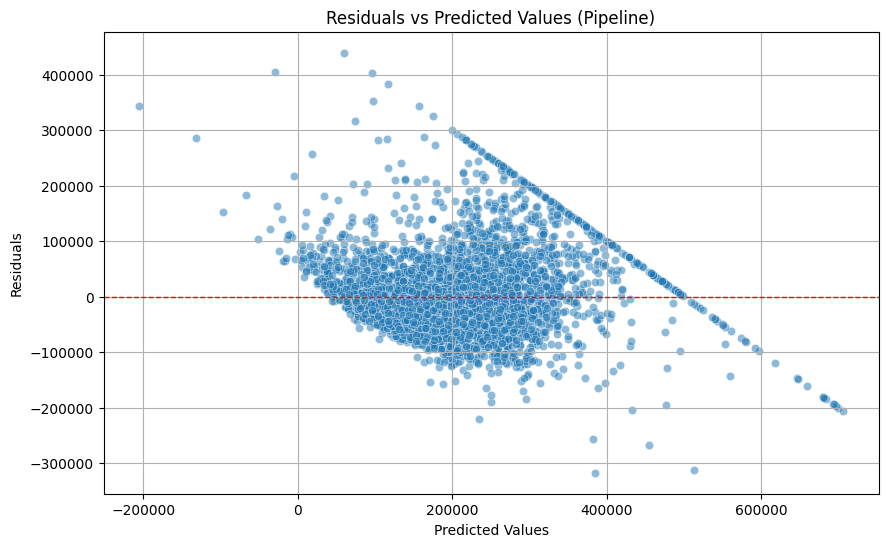

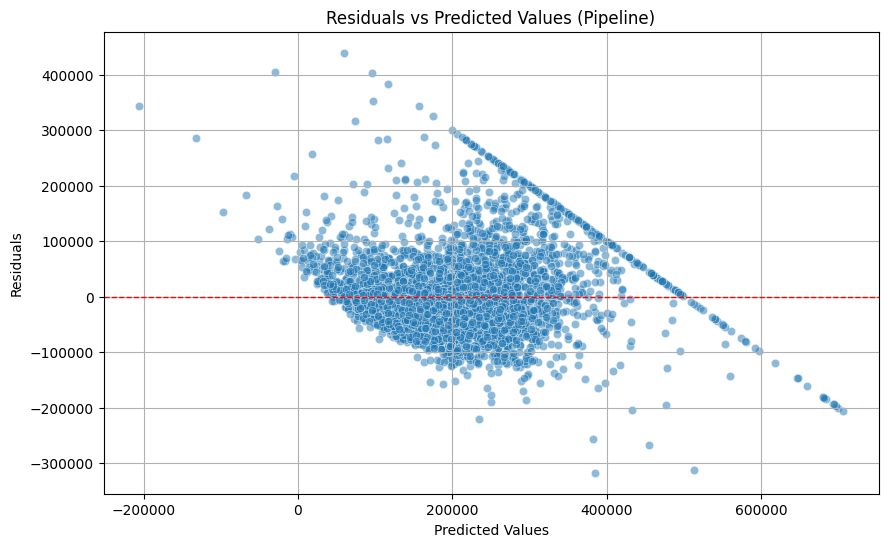

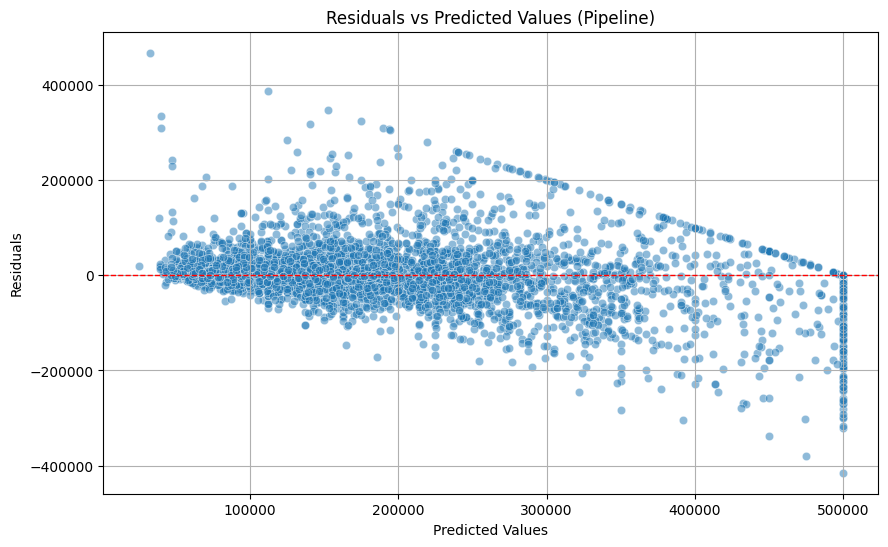

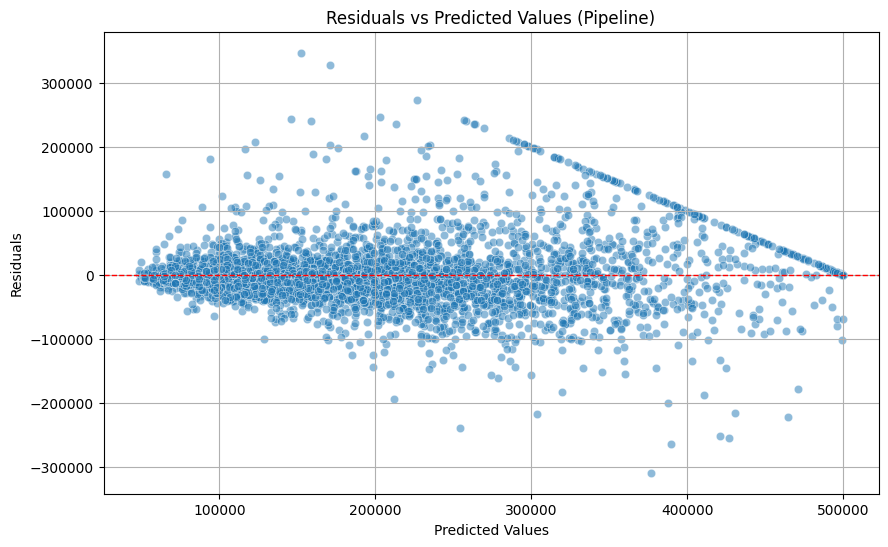

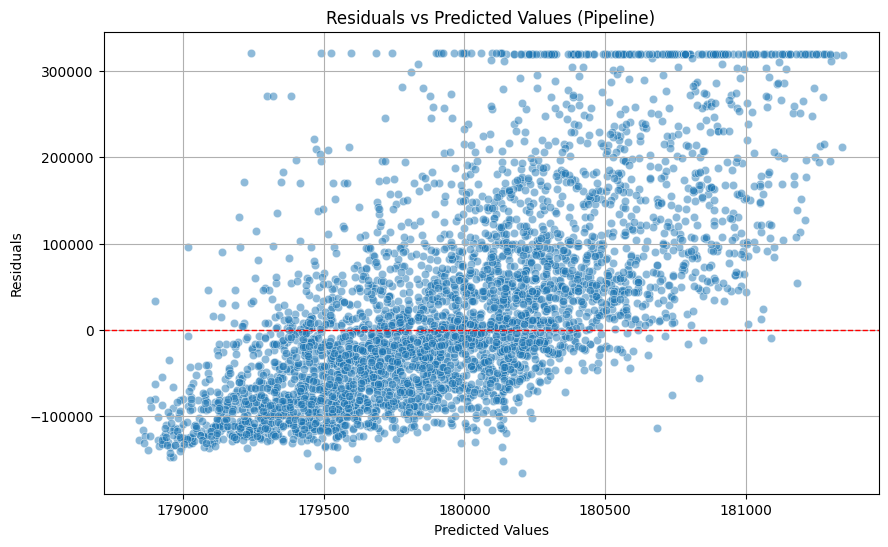

                                    MAE           MSE           RMSE        R2
Linear Regression          51810.089335  5.059656e+09   71131.259184  0.613887
Ridge Regression           51808.133919  5.059150e+09   71127.701118  0.613926
Lasso Regression           51809.878687  5.059570e+09   71130.657604  0.613894
Decision Tree Regression   44206.731105  4.791169e+09   69218.270734  0.634376
Random Forest Regression   32058.864939  2.469604e+09   49695.108912  0.811539
Support Vector Regression  87098.133535  1.367640e+10  116946.135492 -0.043674


<ipython-input-16-dcb5f550ce59>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='MAE', data=results_df, ax=axes[0, 0], palette='viridis')
<ipython-input-16-dcb5f550ce59>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='MSE', data=results_df, ax=axes[0, 1], palette='viridis')
<ipython-input-16-dcb5f550ce59>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='RMSE', data=results_df, ax=axes[1, 0], palette='viridis')
<ipython-input-16-dcb5f550ce59>:81: FutureWarning: 

Passing

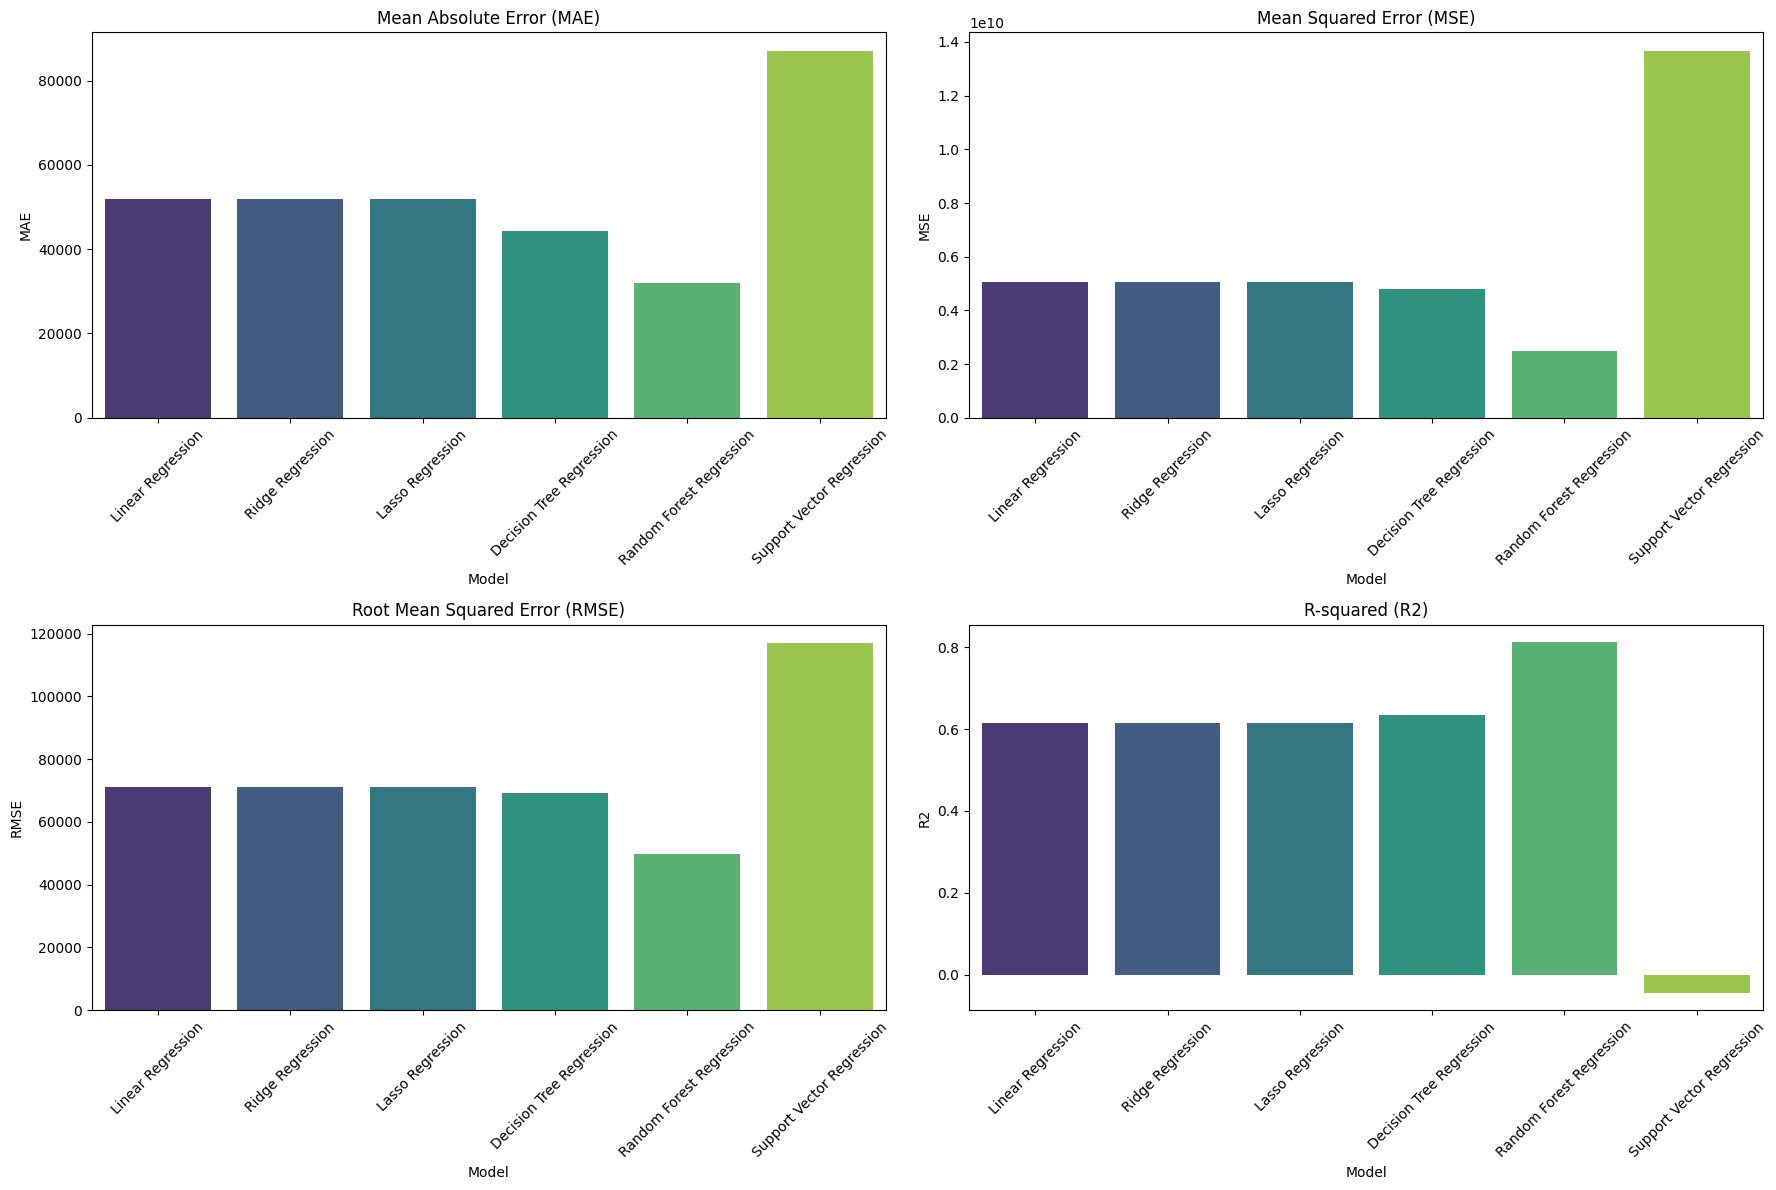

In [16]:
# Define and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

# Initialize results dictionary
results = {}

# Function to plot residuals
def plot_residuals(model, X_test, y_test):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Predicted Values ({model.__class__.__name__})')
    plt.grid(True)
    plt.show()

# Preprocess the data and fit each model
for name, model in models.items():
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

    # Plot residuals
    plot_residuals(pipeline, X_test, y_test)

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results).T

# Display the performance metrics in a tabular format
print(results_df)

# Bar charts comparing performance metrics of different models
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Mean Absolute Error (MAE)
sns.barplot(x=results_df.index, y='MAE', data=results_df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].tick_params(axis='x', rotation=45)

# Mean Squared Error (MSE)
sns.barplot(x=results_df.index, y='MSE', data=results_df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# Root Mean Squared Error (RMSE)
sns.barplot(x=results_df.index, y='RMSE', data=results_df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=45)

# R-squared (R2)
sns.barplot(x=results_df.index, y='R2', data=results_df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('R-squared (R2)')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('R2')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Performance Evaluation

We will present the performance metrics of each model using:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R²)

We will display these metrics in a tabular format and visualize them using bar charts.


                                    MAE           MSE           RMSE        R2
Linear Regression          51810.089335  5.059656e+09   71131.259184  0.613887
Ridge Regression           51808.133919  5.059150e+09   71127.701118  0.613926
Lasso Regression           51809.878687  5.059570e+09   71130.657604  0.613894
Decision Tree Regression   44206.731105  4.791169e+09   69218.270734  0.634376
Random Forest Regression   32058.864939  2.469604e+09   49695.108912  0.811539
Support Vector Regression  87098.133535  1.367640e+10  116946.135492 -0.043674


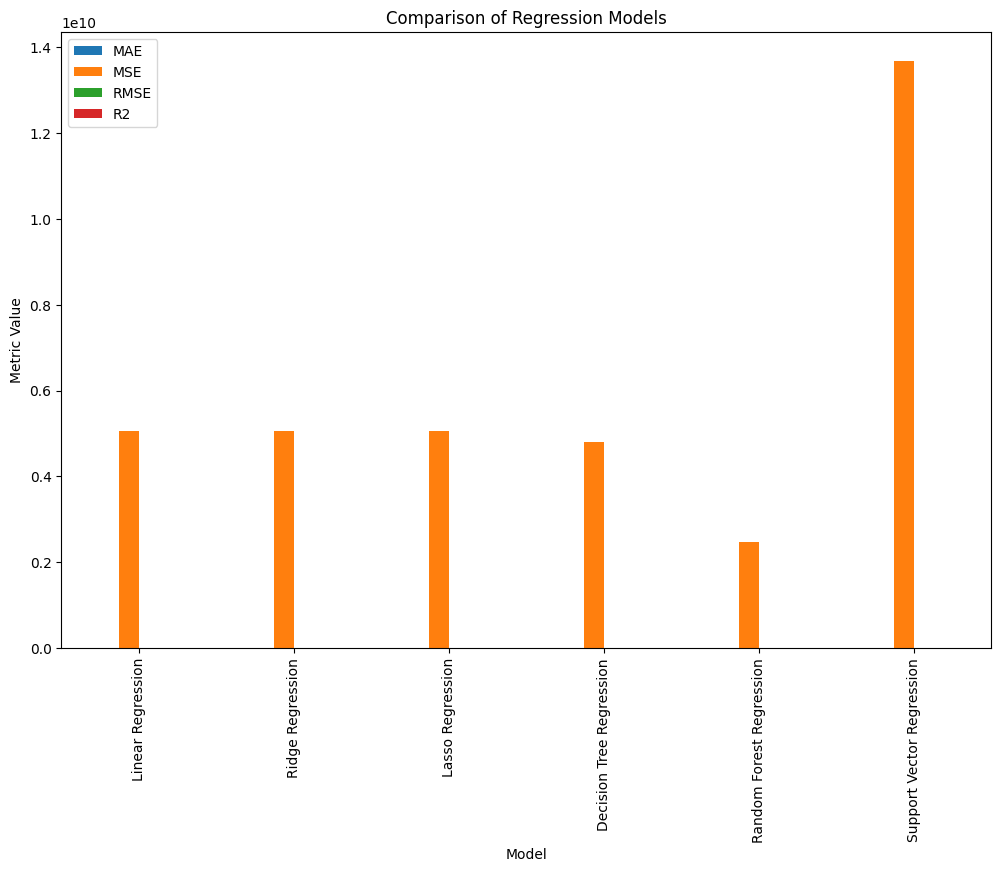

In [18]:
# Display the performance metrics in a tabular format
print(results_df)

# Bar charts comparing performance metrics of different models
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.show()


 ## Discussion and Conclusion

In this section, we will discuss the performance of each regression model based on the metrics obtained and the visualizations provided.

 ### Model Performance

- **Linear Regression, Ridge Regression, Lasso Regression**: These models performed similarly with an R² score of 0.61, indicating moderate predictive power but limitations in capturing complex relationships.
- **Decision Tree Regression**: Improved performance with an R² score of 0.63, suggesting better handling of non-linear data but still prone to overfitting.
- **Random Forest Regression**: Best performance with an R² score of 0.81, effectively capturing complex patterns and providing accurate predictions.
- **Support Vector Regression (SVR)**: Poor performance with a negative R², indicating that it struggled with this dataset.

### Best Performing Model

The **Random Forest Regression** model is the best performer, offering the highest accuracy and robustness.

Overall, this analysis provides insights into how different regression models perform on the California Housing Dataset and helps in understanding the strengths and limitations of each approach.



**Key Points Addressed in the Notebook:**

1. **Data Exploration**: Includes verification of column names and ensuring that categorical variables are properly handled.
2. **Data Preprocessing**: Properly handles missing values and applies appropriate transformations.
3. **Model Implementation**: Includes fitting and evaluating several regression models.
4. **Visualization**: Provides scatter plots, residual plots, and performance comparisons.
5. **Discussion and Conclusion**: Offers insights into the performance of each model and provides recommendations.




In [20]:
# Discussion and Conclusion (fill with appropriate discussion based on results)
print("Discussion and Conclusion:")
print("Model Performance:")
for model, metrics in results.items():
    print(f"\n{model}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R2: {metrics['R2']:.2f}")

best_model = results_df['R2'].idxmax()
print(f"\nBest Performing Model: {best_model}")

Discussion and Conclusion:
Model Performance:

Linear Regression:
  MAE: 51810.09
  MSE: 5059656033.13
  RMSE: 71131.26
  R2: 0.61

Ridge Regression:
  MAE: 51808.13
  MSE: 5059149866.30
  RMSE: 71127.70
  R2: 0.61

Lasso Regression:
  MAE: 51809.88
  MSE: 5059570451.24
  RMSE: 71130.66
  R2: 0.61

Decision Tree Regression:
  MAE: 44206.73
  MSE: 4791169003.34
  RMSE: 69218.27
  R2: 0.63

Random Forest Regression:
  MAE: 32058.86
  MSE: 2469603849.81
  RMSE: 49695.11
  R2: 0.81

Support Vector Regression:
  MAE: 87098.13
  MSE: 13676398606.54
  RMSE: 116946.14
  R2: -0.04

Best Performing Model: Random Forest Regression


In [ ]:















































































































--------------------------------------




















































































































































































































































